__Problem set for Week 4.__ Machine Learning. Problems for linear regression and gradient descent.

# Linear regression

In this exercise we use the California Housing Prices dataset from the StatLib repository. This dataset was based on data from the 1990 California census. Our goal is to build a model of housing prices in California using the Housing Prices dataset. Each row corresponds to a data for a _block group_ or a district in California typically has a population of 600 to 3,000 people. 

__Goal__: Create a regression model that calculates the median housing price in any district, given all the other metrics.

## Preprocessing the dataset

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

housing = pd.read_csv('housing.csv')

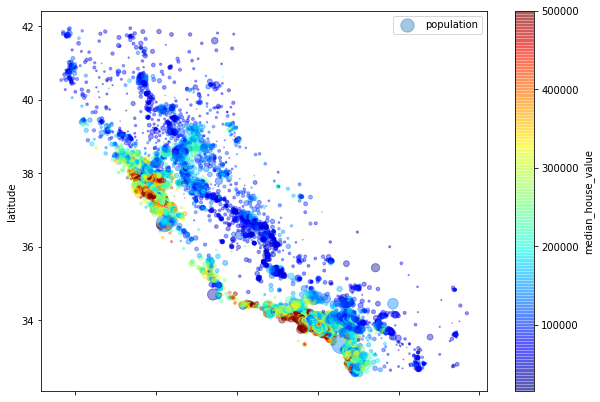

In [11]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

__Problem 0__. Looking at the visualization above for the `median_house_value` as a function of `longitude` and `latitude`, ignoring other variables, does a linear model look like a good choice for this problem? 

In [12]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


The dataset has 10 attributes: `longitude`, `latitude`, `housing_median_age`, `total_rooms`, `total_bed
rooms`, `population`, `households`, `median_income`, `median_house_value`, and
`ocean_proximity`. All have numeric values except the last column. 

__Problem 1__. Check each column. How many values are missing? How will you deal with the missing values?

__Problem 2__. How many categories exist for the column `ocean_proximity`? How many data points belong to each category?

__Problem 3__. How would you transform values in `ocean_proximity` so that the values are numeric (e.g. integers)? Look up "one-hot encoding", how woud you transform the `housing` dataframe so that the `ocean_proximity` class is one-hot encoded? 

For the missing values you have three choices: `dropna()`, `drop()`, and `fillna()`
methods. For simplicity, we fill the missing values with the median of the column.

In [39]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

Finally, transform the categorical feature so that it is one-hot encoded: 

In [33]:
housing = pd.get_dummies(housing, 'ocean_proximity')

In [34]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


Now that the data is preprocessed, we split the data set purely randomly:

In [41]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
y_train, y_test = train_set['median_house_value'].values, test_set['median_house_value'].values

train_set.drop('median_house_value', axis=1, inplace=True)
test_set.drop('median_house_value', axis=1, inplace=True)

X_train, X_test = train_set.values, test_set.values

print(X_train.shape, y_train.shape)

(16512, 13) (16512,)


## Training and evaluation

Since our data set has 13 features, a (preprocessed) data point is of the form $(x_1, \ldots, x_{13})$. A __linear regression model__ predicts the `median_house_value` to be
$$ \hat{y} = \theta_0 + \sum_{i=1}^{13} \theta_i x_i$$

where $\theta_0$ (intercept), $\theta_1, \ldots, \theta_{13}$ (coefficients) are fixed constants. For example, for the first training example `X_train[0]`, 

$$\hat{y} = \theta_0 + -117.03 \theta_1 + 32.71 \theta_2 + \ldots + \theta_{13}.$$ 

The goal of training is to find parameter values $\theta_0, \theta_1, \ldots, \theta_{13}$ such that the error on the training set `X_train`, `y_train` is minimized. The parameters can be interpreted as weights which determine feature importance! 

In [149]:
X_train[0] # the values plugged into the equation above

array([-1.1703e+02,  3.2710e+01,  3.3000e+01,  3.1260e+03,  6.2700e+02,
        2.3000e+03,  6.2300e+02,  3.2596e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  1.0000e+00])

__Problem 4__. Train the linear regression model from `sklearn` using our training data `X_train` and `y_train`. What are the learned parameters of the model (intercept and coefficients)? Which features are most predictive in determining the median house value? 

__Problem 5__. Calculate the root mean square error of the trained model (a) during training, and (b) during testing. (You have the choice of importing the relevant function from `sklearn` or coding the function yourself.)

__Problem 6__. How satisfactory are the results of evaluation?

### Cost function

As mentioned above, in linear regression we find parameters $\theta_0, \theta_1, \ldots, \theta_{13}$ so that the error is minimized. What we mean by "error" is defined precisely using a __cost function__. The choice of a cost function is determined by prior knowledge, as well as convenience. Here we use the mean square error (MSE) cost function:

$$J({\theta}) = \frac{1}{n}\sum_{j=1}^n \left({y}^{(j)} - \hat{y}^{(j)}\right)^2 =  \frac{1}{n}\sum_{j=1}^n  \left(y^{(j)} - \theta_0 - \sum_{i=1}^{13} \theta_i x_i^{(j)} \right)^2.$$

The sum runs over all training examples $\left(x^{(j)}, y^{(j)}\right)$. In our case, $j$ runs from $1$ to $n = 16512$ where $x^{(j)}$ is a vector of size 13.  

In [445]:
import numpy as np

def cost(theta, X, y):
    theta = np.array(theta)
    n = len(X)
    return (1/n)*np.sum((theta[0] + np.matmul(theta[1:], X.T) - y)**2)

__Problem 7__. Generate a vector `theta` of the correct size (arbitrary values).  Find the cost for this choice of weights.

In [ ]:
theta = # code here
cost(theta, X_train, y_train)

# Gradient descent

For the sake of simplicity and visualization, we perform gradient descent on an artificial data set `X` (1 feature), `y` of size 10,000 defined as follows:

In [434]:
n = 10000
X = np.linspace(0, 1, n) # num features = 1
y = 2 + 3*X + np.random.normal(loc=0, scale=0.1, size=n)

__Problem 8__. What are the parameters $\theta_0, \theta_1$ for best fitting line $\hat{y} = \theta_0 + \theta_1 x$ (dashed red in the plot below)? Plot the line defined by these choice of parameters. What is the cost for this choice of parameters?

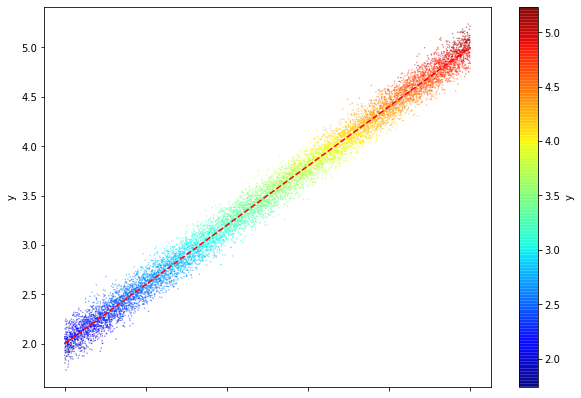

In [447]:
# we visualize the samples using a heat map
pd.DataFrame({'X': X, 'y': y}).plot(kind="scatter", x="X", y="y", alpha=0.8,
s=0.1, figsize=(10,7),
c="y", cmap=plt.get_cmap("jet"), colorbar=True,
)

y_pred = # your code here
plt.plot(X, y_pred, 'r--')

In [ ]:
theta = # your code here
cost(theta, X.reshape(-1, 1), y) # cost for this choice of theta

__Problem 9.__ Looking at the visualization, is a linear regression model a good choice for predicting `y`?

$$ $$ 

## Coding the gradient descent algorithm

We want to minimize the error as measured by $J(\theta)$ for the choice of parameter $\theta$. We describe the __gradient descent algorithm__. In the beginning, we don't know anything about $\theta$, so we simply initialize it with some arbitrary value $\theta_0$. It turns out from calculus that updating 

$$\theta \leftarrow \theta - \alpha \nabla J(\theta)$$

would result to decreasing $J$ for some suitable choice of a constant $\alpha > 0$ called the _learning rate_. (Don't worry about the vector function $\nabla J$, we will give a formula for it below.) The algorithm terminates whenever $\lVert \nabla J (\theta) \rVert $ is small enough, so that $\theta$ stops updating. This happens precisely when the cost $J$ is at a minimum. 


The learning rate $\alpha$ is called a _hyperparameter_ since its choice is not determined during training. The learning rate is chosen in such a way that it is not too small that the algorithm converges too slowly (takes forever), nor too large such that each step misses the optimal value for $\theta$ (will not converge to a solution).

For our artificial data set $n = 10,000$ and we have exactly 1 feature so that the cost function is given by

$$J({\theta}) = \frac{1}{10,000} \sum_{j=1}^{10,000}  \left( \theta_0 + \theta_1 x^{(j)} - y^{(j)} \right)^2.$$


It turns out that 

$$\nabla J (\theta) = \left[\frac{1}{5,000}\sum_{j=1}^{10,000} \left(\theta_0 + \theta_1 x^{(j)} -y^{(j)} \right), \frac{1}{5,000}\sum_{j=1}^{10,000} x^{(j)}\left(\theta_0 + \theta_1 x^{(j)} - y^{(j)} \right)\right].$$

In [452]:
def grad_cost(theta, X, y):
    g0 = 1/5000 * (theta[0] + theta[1]*X - y).sum()
    g1 = 1/5000 * (X*(theta[0] + theta[1]*X - y)).sum()
    return np.array([g0, g1])

__Gradient descent algorithm__

In [614]:
MAX_ITER = 5000 # max no. of iterations
alpha = 0.1     # hyperparameter

theta = 10*np.random.rand(2) # initialize 
k = 1
while k < MAX_ITER:
    theta = theta - alpha*grad_cost(theta, X, y)
    k += 1
    if max(abs(grad_cost(theta, X, y))) < 0.001:
        break
print(theta)    

[2.00368651 2.99081712]


In [617]:
cost([2.00368651, 2.99081712], X.reshape(-1, 1), y)

0.009925805839310993

In [618]:
cost([2, 3], X.reshape(-1, 1), y)

0.009922604196786743

__Problem 10__. Generate three plots of cost as it decreases at every iteration for `alpha = 0.001, 0.01, 0.8`. Observe the effect of choosing a learning rate. Use `cost(theta, X.reshape(-1, 1), y)` to calculate the cost for the current `theta` value.